<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/ANN_learning_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Study the single layer neural network for different Learning rates


In [ ]:
# import Libraries

import torch

import torch.nn as nn

import numpy as np

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# parameters
nPerClust = 100

blur = 1
A=[ 1,1]
B=[ 5,1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]


In [ ]:
# true Labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

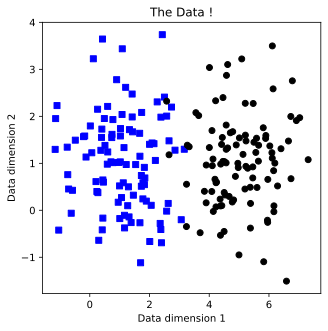

In [ ]:
# show the data

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1], 'ko')
plt.title('The Data !')

plt.xlabel('Data dimension 1')

plt.ylabel("Data dimension 2")

plt.show()


Final accuracy: 50%


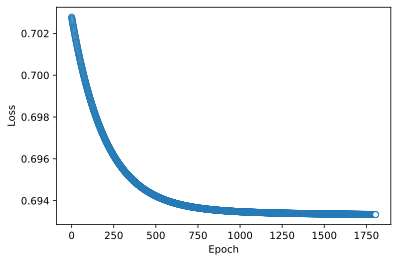

In [ ]:
def createANNmodel(learningRate) :

   # model architecture
   ANNclassify = nn.Sequential(
   nn.Linear(2,1), # input Layer
   nn.ReLU(), # activation unit
   nn.Linear(1,1), # output unit
   #nn. Sigmoid(), # final activation unit (not needed b/c we use BCEWithLogi
   
   )
   
   # Loss function
   lossfun = nn.BCEWithLogitsLoss()
   
   # optimizer
   optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
   
   # model output
   return ANNclassify, lossfun, optimizer

# a function that trains the model

# a fixed parameter
numepochs = 1806

def trainTheModel (ANNmodel) :

  # initialize Losses
  losses = torch.zeros(numepochs)
  
  # Loop over epochs
  
  for epochi in range(numepochs):
  
     # forward pass
     yHat = ANNmodel (data)
     
     # compute Loss
     loss = lossfun(yHat, labels)
     losses[epochi] = loss
     
     # backprop
     
     optimizer. zero_grad()
     loss.backward()
     optimizer. step()
  
  # final forward pass
  predictions = ANNmodel(data)
  
  # compute the predictions and report accuracy
  # NOTE: shouldn't it be predictions>.5??
  totalacc = 100*torch.mean(((predictions>0) == labels).float())
  
  return losses, predictions, totalacc
  


# create everything
ANNclassify, lossfun,optimizer = createANNmodel(.01)

# run it
losses, predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the Losses

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')

plt.show()


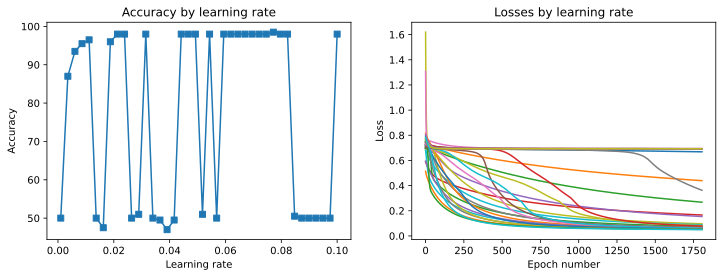

In [ ]:
# the set of Learning rates to test
learningrates = np.linspace(.001, .1,40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs) )

# Loop through Learning rates
for i,lr in enumerate(learningrates) :

# create and run the model
   ANNclassify, lossfun, optimizer = createANNmodel(lr)
   losses,predictions,totalacc = trainTheModel (ANNclassify)
   
   # store the results
   accByLR.append(totalacc)
   allLosses[i,:] = losses.detach()

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel( 'Learning rate')
ax[0].set_ylabel('Accuracy' )
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

plt.show()

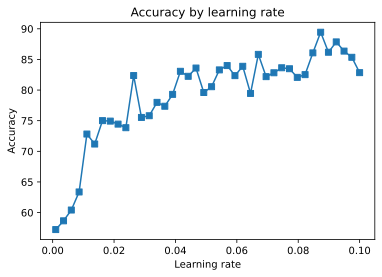

In [ ]:

# number of times to iterate through the experiment
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps, len(learningrates) ))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates) :

     # create and run the model
     ANNclassify, lossfun,optimizer = createANNmodel (lr)
     losses, predictions,totalacc = trainTheModel(ANNclassify)
     
     # store the results
     accMeta[expi,i] = totalacc

# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')

plt.ylabel( 'Accuracy' )

plt.title('Accuracy by learning rate')

plt.show()
